# Virtual Environment Setup

In [1]:
# Install virtualenv to create a virtual environment
!pip install virtualenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 16.1 MB/s eta 0:00:00


In [2]:
# Create a virtual environment called pytorch_env
!virtualenv pytorch_env

created virtual environment CPython3.10.12.final.0-64 in 1519ms
  creator CPython3Posix(dest=/content/pytorch_env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.3.1, setuptools==75.6.0, wheel==0.45.1
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [3]:
# Activate Virtual Environemnt
!source pytorch_env/bin/activate

# Installing PyTorch in the virutal environemnt

In [4]:
!pip install torch torchvision torchaudio

# Code Examples from Chapter 4 of the Book

In [5]:
# Processing of Information by Neural Networks

import torch
import torch.nn as nn


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(3, 5)  # Input layer with 3 neurons and hidden layer with 5 neurons
        self.layer2 = nn.Linear(5, 1)  # Hidden layer with 5 neurons and output layer with 1 neuron
        self.activation = nn.ReLU()    # Activation function


    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x


# Create an instance of the SimpleNN class
model = SimpleNN()


# Generate random input data
input_data = torch.randn(1, 3)


# Forward pass through the network
output = model(input_data)
print(output)


tensor([[-0.5565]], grad_fn=<AddmmBackward0>)


In [6]:
# Example of Simple Neural Network

import torch
import torch.nn as nn


class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 16 * 16, 10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 32 * 16 * 16)
        x = self.fc1(x)
        return x


In [9]:
# Training Neural Networks

# Import statements
import torch.optim as optim
import torch.nn.functional as F


# Create an instance of the network
net = SimpleCNN()


# Define a loss function
criterion = nn.CrossEntropyLoss()


# Define an optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


# Dummy dataset
inputs = torch.randn(100, 3, 32, 32)
labels = torch.randint(0, 10, (100,))


# Training loop
for epoch in range(10):
    running_loss = 0.0
    for i in range(100):
        inputs, labels = inputs, labels

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


        running_loss += loss.item()
        if i % 10 == 9:
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 10:.3f}")
            running_loss = 0.0


[1, 10] loss: 2.184
[1, 20] loss: 1.582
[1, 30] loss: 0.942
[1, 40] loss: 0.517
[1, 50] loss: 0.299
[1, 60] loss: 0.195
[1, 70] loss: 0.142
[1, 80] loss: 0.112
[1, 90] loss: 0.092
[1, 100] loss: 0.079
[2, 10] loss: 0.069
[2, 20] loss: 0.062
[2, 30] loss: 0.055
[2, 40] loss: 0.050
[2, 50] loss: 0.046
[2, 60] loss: 0.043
[2, 70] loss: 0.040
[2, 80] loss: 0.037
[2, 90] loss: 0.035
[2, 100] loss: 0.033
[3, 10] loss: 0.031
[3, 20] loss: 0.029
[3, 30] loss: 0.028
[3, 40] loss: 0.026
[3, 50] loss: 0.025
[3, 60] loss: 0.024
[3, 70] loss: 0.023
[3, 80] loss: 0.022
[3, 90] loss: 0.021
[3, 100] loss: 0.020
[4, 10] loss: 0.020
[4, 20] loss: 0.019
[4, 30] loss: 0.018
[4, 40] loss: 0.018
[4, 50] loss: 0.017
[4, 60] loss: 0.016
[4, 70] loss: 0.016
[4, 80] loss: 0.015
[4, 90] loss: 0.015
[4, 100] loss: 0.015
[5, 10] loss: 0.014
[5, 20] loss: 0.014
[5, 30] loss: 0.013
[5, 40] loss: 0.013
[5, 50] loss: 0.013
[5, 60] loss: 0.012
[5, 70] loss: 0.012
[5, 80] loss: 0.012
[5, 90] loss: 0.012
[5, 100] loss: 0

In [11]:
# Loading Image data

# Example to load image data
import torch
from torchvision import datasets, transforms


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])


trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)


testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)


100%|██████████| 170M/170M [00:03<00:00, 49.6MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [12]:
# Evaluating Neural Networks

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the test images: 10 %


Files already downloaded and verified
Files already downloaded and verified


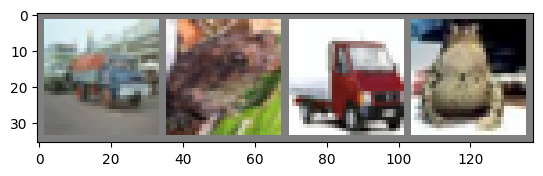

truck  frog truck  frog


In [13]:
# Constructing and Training an Image Classification Model

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision


from torchvision import datasets, transforms


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])


trainset = datasets.CIFAR10(root='./data', train=True,
                            download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)


testset = datasets.CIFAR10(root='./data', train=False,
                           download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)


# Define the classes in CIFAR-10 dataset
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# Show some example images from the dataset
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)  # This line should work without any error


# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))



In [14]:
# Install torchviz
!pip install torchviz

In [15]:
# Define the Neural Network Architecture

import torch
import torch.nn as nn
import torch.nn.functional as F


class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Create network with the class above:
net = SimpleCNN()


# Creating complied_net with PyTorch 2.0
compiled_net = torch.compile(net)


# Only for visualization
import torchviz


x = torch.randn(1, 3, 32, 32)  # assuming input size 32x32 RGB images
y = net(x)
torchviz.make_dot(y.mean(), params=dict(net.named_parameters())).render("network_pt1x", format="png")


y = compiled_net(x)
torchviz.make_dot(y.mean(), params=dict(compiled_net.named_parameters())).render("network_pt2_0", format="png")


'network_pt2_0.png'

In [16]:
# Loading and Preprocessing dataset

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])


trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)


testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


In [20]:
# Defining Loss Function and Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(compiled_net.parameters(), lr=0.001, momentum=0.9)


In [23]:
# Complete Training Code and Infernece

import torch
import torchvision
import torchvision.transforms as transforms


# Set up the transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])


# Load the CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)


testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)


classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# Define the neural network
import torch.nn as nn
import torch.nn.functional as F


class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = SimpleCNN()


# Compile the model with torch.compile for PyTorch 2.0
compiled_net = torch.compile(net)


# Set up the loss function and optimizer
import torch.optim as optim


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(compiled_net.parameters(), lr=0.001, momentum=0.9)


# Train the network
for epoch in range(5):  # Loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = compiled_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:    # Print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0


print('Finished Training')


# Test the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = compiled_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.165
[1,  4000] loss: 1.847
[1,  6000] loss: 1.673
[1,  8000] loss: 1.559
[1, 10000] loss: 1.509
[1, 12000] loss: 1.495
[2,  2000] loss: 1.418
[2,  4000] loss: 1.382
[2,  6000] loss: 1.367
[2,  8000] loss: 1.329
[2, 10000] loss: 1.324
[2, 12000] loss: 1.297
[3,  2000] loss: 1.228
[3,  4000] loss: 1.230
[3,  6000] loss: 1.224
[3,  8000] loss: 1.222
[3, 10000] loss: 1.219
[3, 12000] loss: 1.177
[4,  2000] loss: 1.114
[4,  4000] loss: 1.116
[4,  6000] loss: 1.113
[4,  8000] loss: 1.161
[4, 10000] loss: 1.115
[4, 12000] loss: 1.106
[5,  2000] loss: 1.035
[5,  4000] loss: 1.056
[5,  6000] loss: 1.071
[5,  8000] loss: 1.039
[5, 10000] loss: 1.038
[5, 12000] loss: 1.046
Finished Training
Accuracy of the network on the 10000 test images: 60 %


In [24]:
# Evaluating Model performance

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 60 %


/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


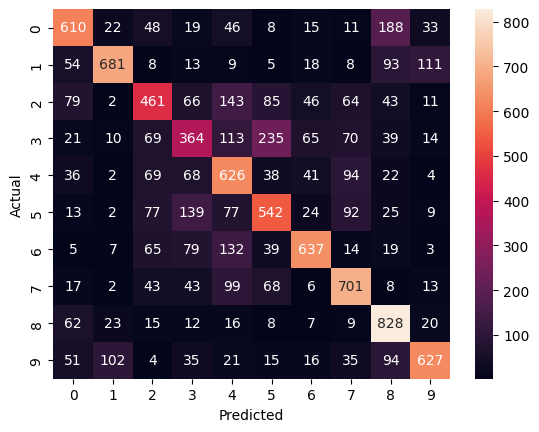

In [25]:
# Creating Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = []
y_true = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [26]:
# Calculate Precision, Recall & F1 Score

from sklearn.metrics import precision_recall_fscore_support

# Prepare for metric calculation
all_labels = np.array([])
all_preds = np.array([])
all_outputs = np.array([])


# Test the network on the test data
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = compiled_net(images)
        _, predicted = torch.max(outputs.data, 1)

        # Store predictions, labels and output scores for metrics
        all_labels = np.append(all_labels, labels.numpy())
        all_preds = np.append(all_preds, predicted.numpy())
        all_outputs = np.append(all_outputs, outputs.numpy())


# Calculate precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
print(f' Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')


 Precision: 0.61, Recall: 0.61, F1 Score: 0.61


ROC-AUC: 0.89


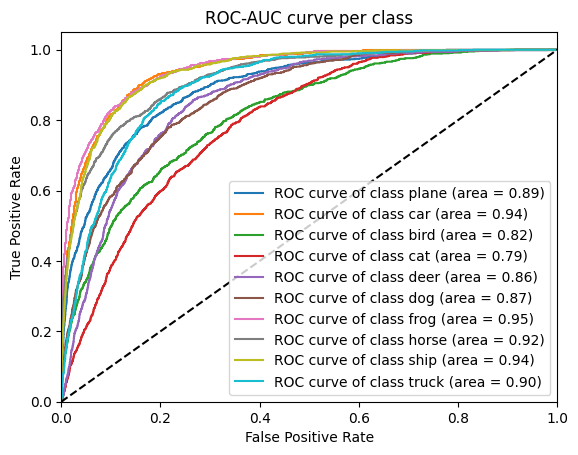

In [30]:
# Create ROC-AUC Curve

from sklearn.metrics import roc_auc_score, roc_curve, auc

# Prepare for metric calculation
all_labels = np.array([])
all_outputs = np.array([])
# Test the network on the test data
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = compiled_net(images)
        _, predicted = torch.max(outputs.data, 1)

        # Store predictions, labels and output scores for metrics
        all_labels = np.append(all_labels, labels.numpy())
        all_outputs = np.append(all_outputs, outputs.numpy())


# One-hot encode labels for ROC-AUC
one_hot_labels = np.eye(10)[all_labels.astype(int)]
roc_auc = roc_auc_score(one_hot_labels, all_outputs.reshape(-1, 10), multi_class='ovr')
print(f'ROC-AUC: {roc_auc:.2f}')
# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(one_hot_labels[:, i], all_outputs.reshape(-1, 10)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {classes[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve per class')
plt.legend(loc="lower right")
plt.show()
